In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


In [2]:
# load the dataset
df = pd.read_csv("dataset.csv")

In [3]:
df.head(2)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## 1.Are the review columns correlated with the rating columns?
#### Review columns: ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
#### Rating columns: ["food", "service", "value", "atmosphere", "avg_rating"]

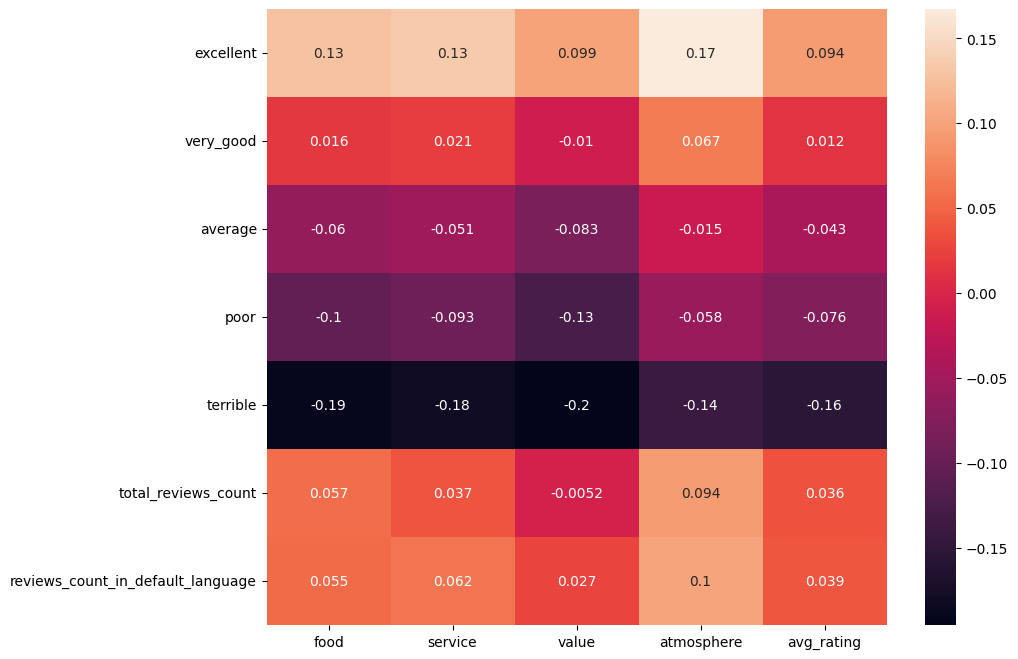

In [4]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Correlation between review columns and rating columns
review_cols = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
rating_cols = ["food", "service", "value", "atmosphere", "avg_rating"]
reviews_ratings_corr = df[review_cols + rating_cols].corr().loc[review_cols,rating_cols]

# Visualize the correlation with a heatmap
sns.heatmap(reviews_ratings_corr, annot=True)
plt.show()



In order to consider two columns as highly correlated, their correlation coefficient should be close to 1 or -1. A correlation coefficient of 1 indicates a perfect positive correlation, where an increase in one variable is directly proportional to an increase in the other variable. A correlation coefficient of -1 indicates a perfect negative correlation, where an increase in one variable is directly proportional to a decrease in the other variable. In general, a correlation coefficient greater than 0.7 or less than -0.7 is considered to be a strong correlation.

In [5]:
# Create an empty list to store the correlated columns
correlated_cols = []

# Iterate through the correlation matrix and identify columns with a correlation greater than 70%
for col in reviews_ratings_corr:
    for i, corr in enumerate(reviews_ratings_corr[col]):
        if abs(corr) > 0.7:
            correlated_cols.append((col, reviews_ratings_corr.columns[i], corr))

correlated_cols

[]

There is no strong correlation.

## 2.Are vegetarian-friendly restaurants better than non-vegetarian ones?

In [6]:
df['vegetarian_friendly'].sample(5)

791195    N
255626    N
974514    Y
645302    Y
847246    N
Name: vegetarian_friendly, dtype: object

In [7]:
# Create a new column that indicates whether a restaurant is vegetarian-friendly or not
df['vegetarian_friendly'] = df['vegetarian_friendly'].apply(lambda x: 1 if x == 'Y' else 0)

# Group the data by the vegetarian_friendly column and calculate the mean values for the rating columns
df_grouped = df.groupby('vegetarian_friendly')[rating_cols].mean()

# Print the results
print(df_grouped)


                         food   service     value  atmosphere  avg_rating
vegetarian_friendly                                                      
0                    3.963376  3.935194  3.866922    3.781855    3.967643
1                    4.235145  4.191907  4.091917    4.032328    4.176086


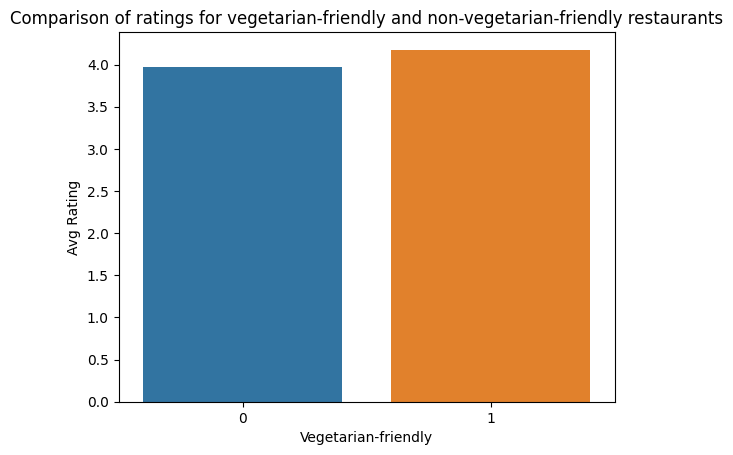

In [8]:
import seaborn as sns

# Create a bar chart to compare the mean rating values for vegetarian-friendly and non-vegetarian-friendly restaurants
sns.barplot(x=df_grouped.index, y='avg_rating', data=df_grouped)

# Add labels and title to the chart
plt.xlabel("Vegetarian-friendly")
plt.ylabel("Avg Rating")
plt.title("Comparison of ratings for vegetarian-friendly and non-vegetarian-friendly restaurants")

# Show the chart
plt.show()


Based on average rating Vegetarian Friendly Restaurants are better than Non Vegetarian Restaurants

## 3. Are there any significantly more expensive cuisines?

there are 2 collums (price_range and price_level) that I can use to evaluate expensiveness of cuisines
price_range: shows min and max prices of corresponding restaurant
price_level: shows how expensive a restaurant is, where €€€€ is more expensive and € is less expensive 

In [9]:
df = df.dropna(subset = ['cuisines'])

In [10]:
df['cuisines_primary'] = df['cuisines'].apply(lambda x: x.split(',')[0])

In [12]:
cuisines_list = ['Italian','Chinese','Mexican','Japanese','Indian','French','Thai','Mediterranean','Korean','Spanish','Greek','Vietnamese','Moroccan','German','Brazilian','Peruvian','Russian','Turkish','Indonesian','Lebanese']
df['cuisines_primary'] = df['cuisines_primary'].apply(lambda x: x if x in cuisines_list else None)

In [13]:
df["cuisines_primary"].value_counts().head(45)

Italian          211946
French            86038
Mediterranean     45233
Spanish           41493
German            29771
Chinese           25047
Indian            18961
Japanese          13710
Greek             13025
Mexican            5956
Turkish            5180
Thai               2680
Lebanese           2542
Moroccan           2331
Vietnamese         1538
Brazilian          1278
Peruvian            715
Russian             229
Korean              197
Indonesian          158
Name: cuisines_primary, dtype: int64

In [14]:
df["price_range"].head(12)

0         NaN
2         NaN
3         NaN
4         NaN
5     €14-€29
6      €8-€17
7     €10-€35
8     €12-€26
9     €12-€30
10        NaN
11        NaN
12        NaN
Name: price_range, dtype: object

In [15]:
# Split the 'price_range' column on '-' and select the second element (the upper range of the price)
df['max_price'] = df['price_range'].str.split('-').str[1]
# Remove the '€' symbol from the extracted price
df['max_price'] = df['max_price'].str.replace("€", "")
# Convert the extracted price to a numeric data type
df['max_price'] = pd.to_numeric(df['max_price'], errors='coerce')
# Remove any rows with missing values in the new 'max_price' column
df.dropna(subset=['max_price'], inplace=True)

In [16]:
df[df["max_price"]>900][["max_price","price_range"]].head()

,max_price,price_range
28504,999.0,€8-€999
108742,998.0,€9-€998
272266,950.0,€250-€950
284077,950.0,€490-€950
331740,999.0,€7-€999


<AxesSubplot:xlabel='max_price'>

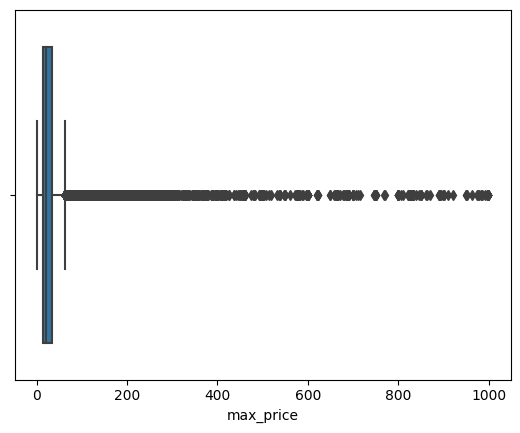

In [17]:
sns.boxplot(x=df['max_price'])

<AxesSubplot:xlabel='max_price', ylabel='Density'>

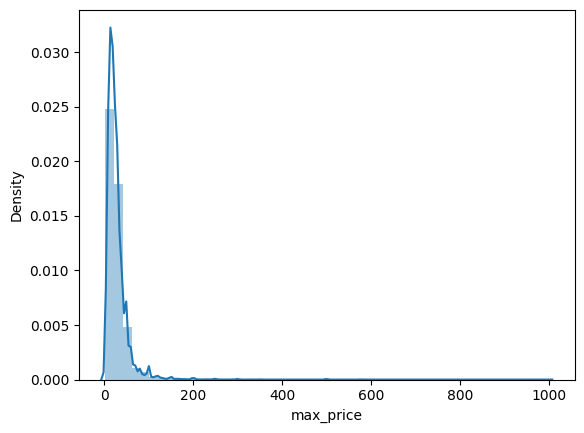

In [18]:
sns.distplot(df['max_price'])

In [19]:
df['max_price'].sort_values(ascending=False).max()

999.0

In [20]:
df.groupby("cuisines_primary")['max_price'].mean().sort_values(ascending=False).head()

cuisines_primary
Japanese         36.921828
French           32.914146
Mediterranean    32.605198
Italian          31.591913
Peruvian         30.395833
Name: max_price, dtype: float64

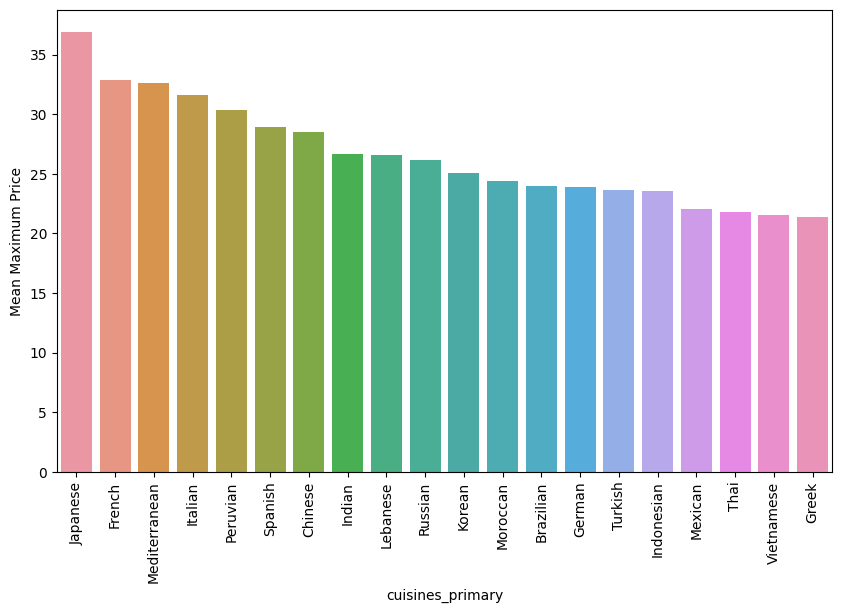

In [21]:
mean_price_by_country = df.groupby("cuisines_primary")['max_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=mean_price_by_country.index, y=mean_price_by_country.values)
plt.ylabel("Mean Maximum Price")
plt.xticks(rotation=90)
plt.show()

Based on average max price Japanase and French cuisines are more expensive cuisines, but note that there are outliers in max price column

In [22]:
# Looking at price level column
df["price_level"].value_counts()

€€-€€€    211830
€          64326
€€€€       14825
Name: price_level, dtype: int64

In [23]:
# Converting symbols to numeric values
price_mapping = {'€': 1, "€€-€€€": 2.5, "€€€€":4}
df['price_level'] = df['price_level'].replace(price_mapping)

In [24]:
# Average price level for countries
df.groupby('cuisines_primary')['price_level'].mean().sort_values(ascending=False).head()

cuisines_primary
Japanese         2.501609
French           2.457806
Peruvian         2.455090
Mediterranean    2.414324
Indian           2.352713
Name: price_level, dtype: float64

In [25]:
mean_price_level_by_country = df.groupby('cuisines_primary')['price_level'].mean().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Japanese'),
  Text(1, 0, 'French'),
  Text(2, 0, 'Peruvian'),
  Text(3, 0, 'Mediterranean'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'German'),
  Text(6, 0, 'Spanish'),
  Text(7, 0, 'Moroccan'),
  Text(8, 0, 'Italian'),
  Text(9, 0, 'Russian'),
  Text(10, 0, 'Indonesian'),
  Text(11, 0, 'Chinese'),
  Text(12, 0, 'Lebanese'),
  Text(13, 0, 'Brazilian'),
  Text(14, 0, 'Thai'),
  Text(15, 0, 'Korean'),
  Text(16, 0, 'Mexican'),
  Text(17, 0, 'Greek'),
  Text(18, 0, 'Vietnamese'),
  Text(19, 0, 'Turkish')])

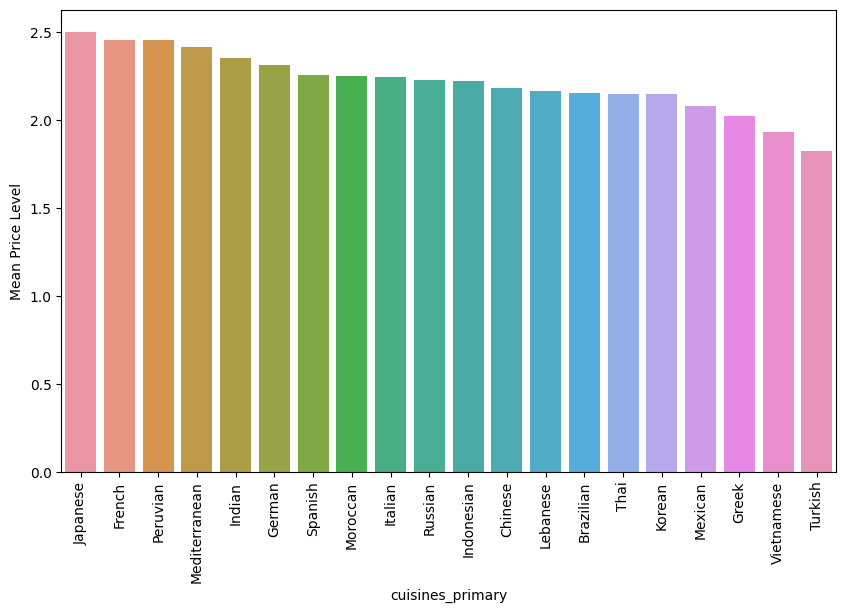

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_level_by_country.index, y=mean_price_level_by_country.values)
plt.ylabel("Mean Price Level")
plt.xticks(rotation=90)

Based on average price level, Japanese and French cuisines are more expensive. 